## AI **CareerScope**
#### Stratergic Plan of Action
To effectively address the problem statement, we have developed the following structured approach:
#### Data Exploration 
- Investigate dataset architecture and core attributes.
- Determine critical variables and validate data types.
- Resolve data quality issues (missing values, outliers, inconsistencies).
- Standardize data formats and validate type appropriateness.

#### Exploratory Data Analysis (EDA)
- Perform comprehensive analysis (univariate, bivariate, and multivariate) to reveal data relationships and trends
- Create strategic visualizations using industry-standard graphical representations

#### Technical Implementation
- **Programming Language:** Python
- **Core Libraries:**
   - Pandas (data manipulation and analysis)
   - Matplotlib & Seaborn (data visualization)

#### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### *Data Exploration*

In [2]:
df = pd.read_csv('ai_job_data.csv')  # Use the first column as index

In [3]:
# to see the first 5 rows
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [4]:
# To view all the columns name 
df.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [5]:
# to identify the number of rows and columns
df.shape

(500, 10)

In [6]:
# To get a concise summary of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [7]:
# To get statistical summary of numerical columns 
df.describe ()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


**There are not any null value**

In [8]:
# To check for missing values in each column.
df.isna( ).sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
len(df.Job_Title.unique())

10

In [11]:
df[df["Job_Title"].duplicated(keep = False)]

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [12]:
Q1 = df['Salary_USD'].quantile(0.25)
Q3 = df['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1

filtered_data = df[(df['Salary_USD'] >= (Q1 - 1.5 * IQR)) & (df['Salary_USD'] <= (Q3 + 1.5 * IQR))]

df = filtered_data

### Analysis and Visualization

- ### Univariate Analysis

**Job Title**

In [13]:
df.head(2)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline


In [14]:
df.Job_Title.value_counts()

Job_Title
Data Scientist           60
HR Manager               57
Cybersecurity Analyst    54
UX Designer              53
AI Researcher            51
Sales Manager            49
Marketing Specialist     47
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

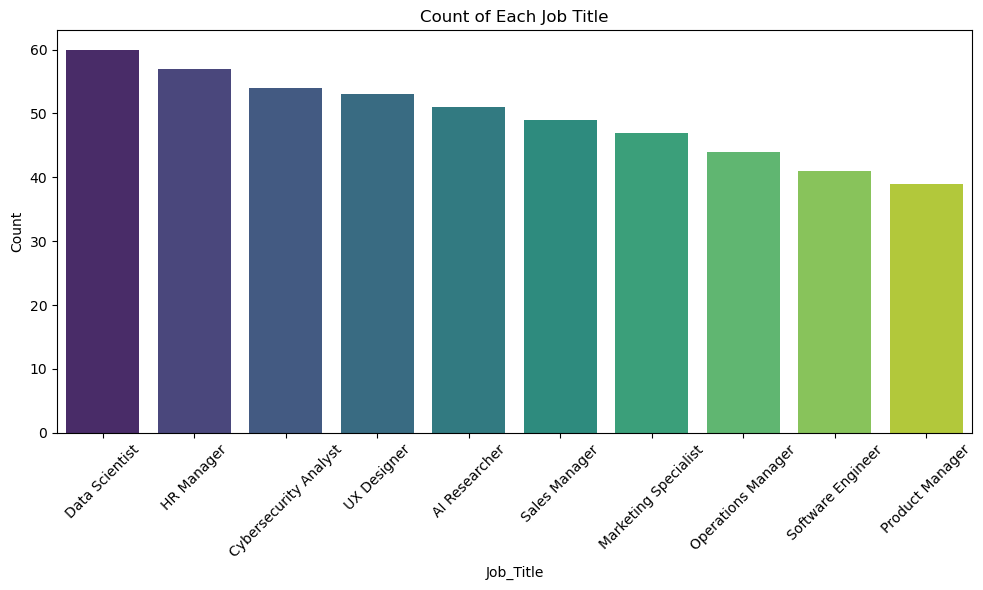

In [15]:
# Prepare data
value_counts = df['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count']

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=value_counts,  # Pass DataFrame here
    x='Job_Title',     # Column name (not a raw string)
    y='Count',         # Column name (not a raw value)
    palette='viridis'  # Optional: Color scheme
)

# Customize
plt.title('Count of Each Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Industry**

In [16]:
value_counts = df.Industry.value_counts()
value_counts

Industry
Manufacturing         58
Education             57
Technology            56
Finance               52
Telecommunications    52
Energy                49
Entertainment         46
Retail                46
Healthcare            41
Transportation        38
Name: count, dtype: int64

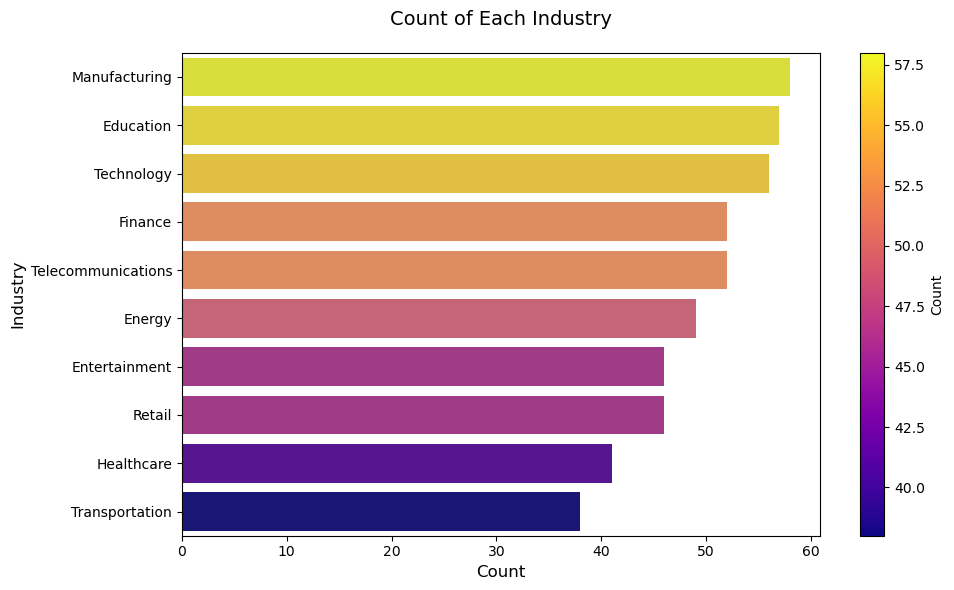

In [17]:
# Prepare the data
value_counts = df['Industry'].value_counts().reset_index()
value_counts.columns = ['Industry', 'Count']

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust width/height as needed
ax = sns.barplot(
    data=value_counts,
    y='Industry',  # Industries on y-axis (horizontal bars)
    x='Count',     # Counts on x-axis
    palette='plasma',  # Matches Plotly's 'Plasma' colors
    hue='Count',       # Color by count values
    dodge=False,       # Single color per bar
    legend=False       # Hide legend
)

# Customize the plot
plt.title('Count of Each Industry', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.tight_layout()  # Prevent label cutoff

# Add colorbar to match Plotly's continuous colors
norm = plt.Normalize(value_counts['Count'].min(), value_counts['Count'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Count')

plt.show()

**company_size**

In [18]:
value_counts = df['Company_Size'].value_counts().reset_index()
value_counts

,Company_Size,count
0,Small,169
1,Large,165
2,Medium,161


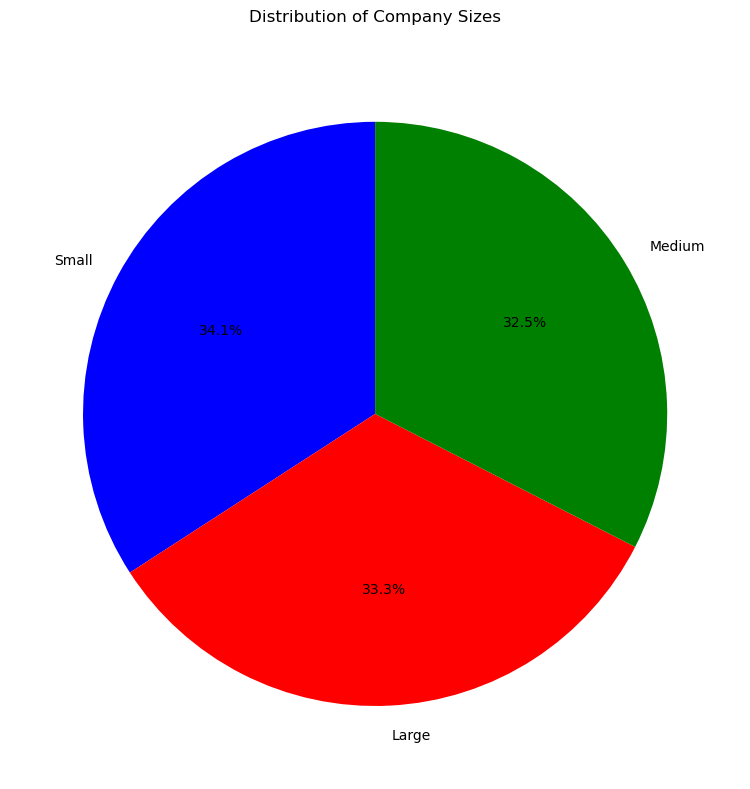

In [19]:
import matplotlib.pyplot as plt

# Prepare data
value_counts = df['Company_Size'].value_counts().reset_index()
value_counts.columns = ['Company_Size', 'Count']

# Custom colors (matching your Plotly version)
custom_colors = {'Small': 'blue', 'Medium': 'green', 'Large': 'red'}

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    value_counts['Count'],
    labels=value_counts['Company_Size'],
    autopct='%1.1f%%',  # Show percentages
    startangle=90,      # Rotate starting position
    colors=[custom_colors[size] for size in value_counts['Company_Size']]  # Apply custom colors
  )

# Add title and style
plt.title('Distribution of Company Sizes', pad=20)
plt.tight_layout()
plt.show()

**Location**

In [20]:
df.Location.value_counts()

Location
San Francisco    61
Singapore        53
Sydney           52
Dubai            51
Tokyo            51
New York         48
Berlin           47
London           46
Paris            45
Toronto          41
Name: count, dtype: int64

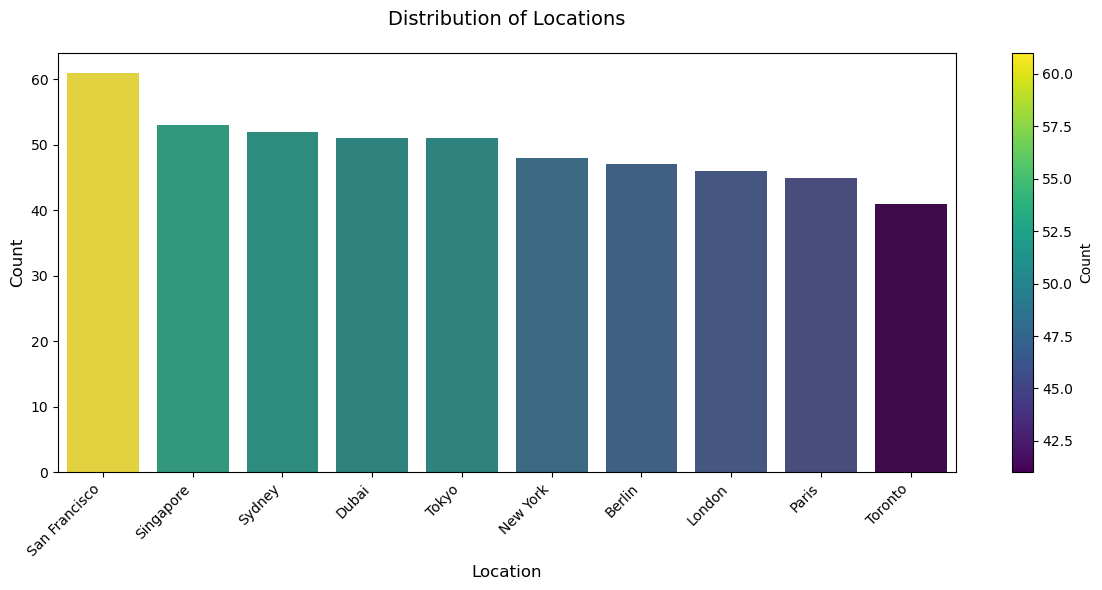

In [21]:

# Prepare data
value_counts = df['Location'].value_counts().reset_index()
value_counts.columns = ['Location', 'Count']

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot with color gradient
ax = sns.barplot(
    data=value_counts,
    x='Location',
    y='Count',
    palette='viridis',  # Matches 'Viridis' color scale
    hue='Count',        # Color by count values
    dodge=False,        # Avoid splitting bars
    legend=False        # Hide legend
)

# Customize plot
plt.title('Distribution of Locations', fontsize=14, pad=20, loc='center')
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels
plt.tight_layout()  # Prevent label cutoff

# Add colorbar to mimic Plotly's continuous colors
norm = plt.Normalize(value_counts['Count'].min(), value_counts['Count'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Count')

plt.show()

**AI_Adoption_Level**

In [22]:
value_counts=df["AI_Adoption_Level"].value_counts()
value_counts

AI_Adoption_Level
Medium    178
Low       172
High      145
Name: count, dtype: int64

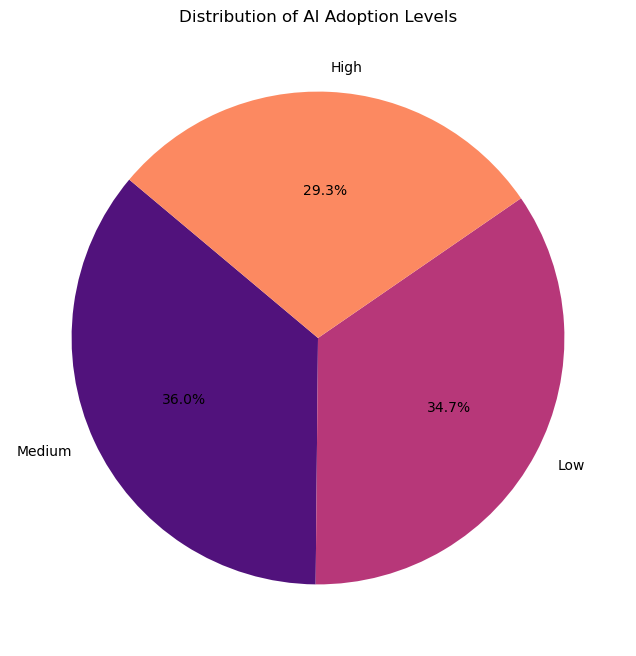

In [23]:
colors = sns.color_palette('magma', len(value_counts))
plt.figure(figsize=(8, 8))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',  
    colors=colors,  
    startangle=140  
)
plt.title('Distribution of AI Adoption Levels')
plt.show()

**Automation_Risk**

In [24]:
df.Automation_Risk.value_counts()

Automation_Risk
Medium    171
High      168
Low       156
Name: count, dtype: int64

In [25]:
value_counts = df['Required_Skills'].value_counts().reset_index()
value_counts

,Required_Skills,count
0,Project Management,60
1,Cybersecurity,58
2,Python,58
3,Machine Learning,52
4,UX/UI Design,48
5,Sales,48
6,Data Analysis,48
7,Marketing,45
8,JavaScript,44
9,Communication,34


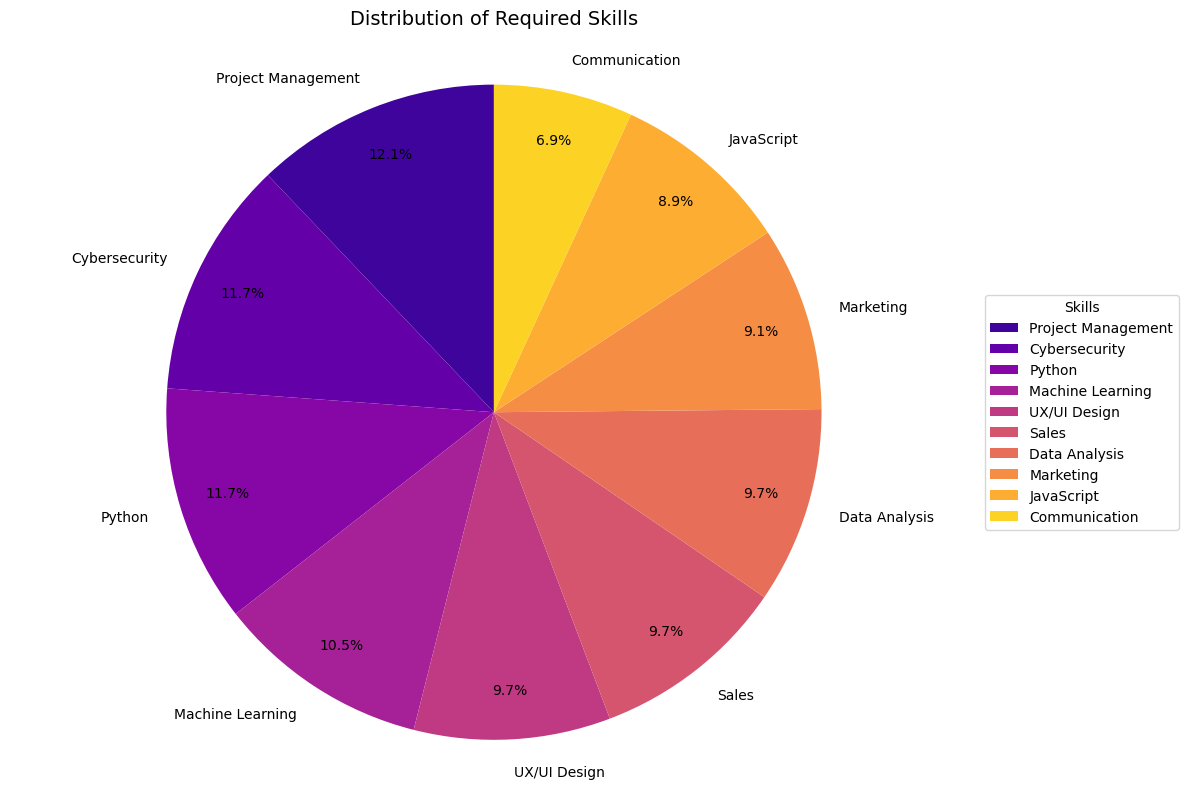

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
value_counts = df['Required_Skills'].value_counts().reset_index()
value_counts.columns = ['Required_Skills', 'Count']

# Create figure
plt.figure(figsize=(10, 8))

# Create pie chart with Plasma color scheme
colors = sns.color_palette("plasma", len(value_counts))
wedges, texts, autotexts = plt.pie(
    value_counts['Count'],
    labels=value_counts['Required_Skills'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85,  # Adjust percentage position
    textprops={'fontsize': 10}
)

# Equal aspect ratio ensures pie is circular
plt.axis('equal')

# Add title and adjust layout
plt.title('Distribution of Required Skills', pad=20, fontsize=14, loc='center')
plt.tight_layout()

# Optional: Add legend for better readability
plt.legend(
    wedges,
    value_counts['Required_Skills'],
    title="Skills",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.show()

**Salary_USD**

In [27]:
df.describe()

,Salary_USD
count,495.000000
mean,91325.220905
std,19741.821674
min,41298.726205
25%,78866.135451
50%,92027.134231
75%,103954.002717
max,140475.995812


In [28]:
df["Salary_USD"].value_counts()

Salary_USD
111392.165243    1
104854.999236    1
97811.878124     1
90737.496084     1
74057.145512     1
                ..
98153.125072     1
98036.517081     1
88155.315907     1
87565.920912     1
68764.378921     1
Name: count, Length: 495, dtype: int64

**There are outliers**

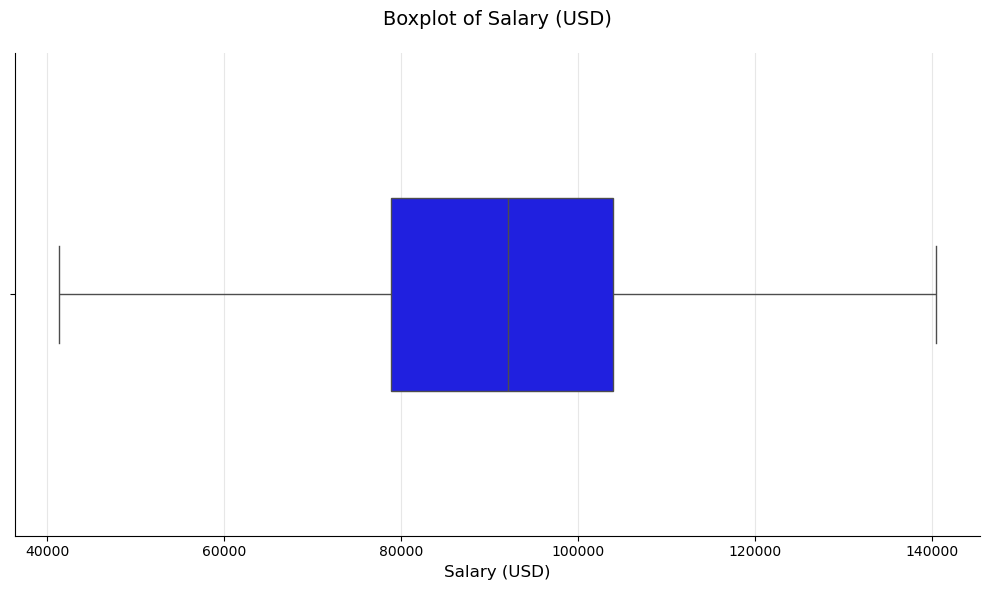

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create boxplot with blue color
sns.boxplot(
    x=df['Salary_USD'],
    color='blue',  # Single color for all boxes
    width=0.4      # Adjust box width
)

# Add titles and labels
plt.title('Boxplot of Salary (USD)', fontsize=14, pad=20)
plt.xlabel('Salary (USD)', fontsize=12)
plt.grid(axis='x', alpha=0.3)  # Add light grid lines

# Remove top/right spines for cleaner look
sns.despine()

plt.tight_layout()
plt.show()

<Axes: xlabel='Salary_USD', ylabel='Density'>

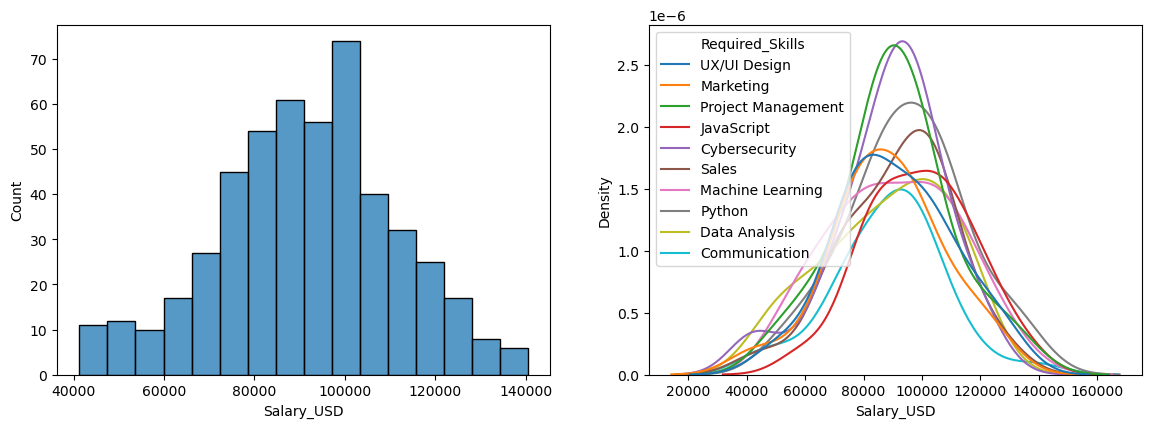

In [30]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(x='Salary_USD',data = df)

plt.subplot(2, 2, 2)
sns.kdeplot(x='Salary_USD', hue='Required_Skills', data = df)

**Remote_Friendly**

In [31]:
df["Remote_Friendly"].value_counts()

Remote_Friendly
Yes    248
No     247
Name: count, dtype: int64

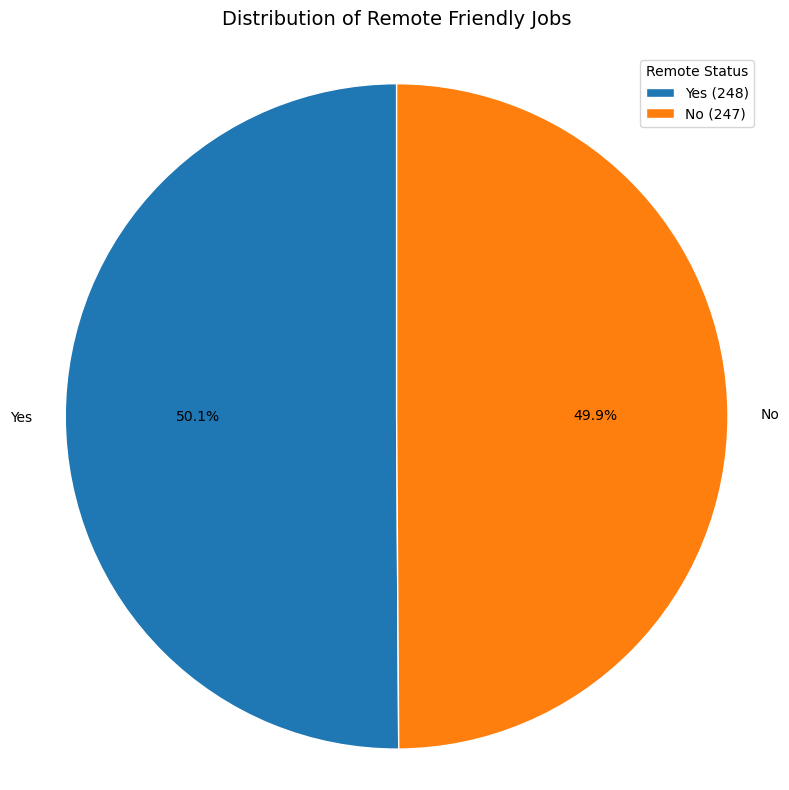

In [32]:
import matplotlib.pyplot as plt

# Prepare data
value_counts = df['Remote_Friendly'].value_counts().reset_index()
value_counts.columns = ['Remote_Friendly', 'Count']

# Create figure
plt.figure(figsize=(8, 8))

# Create pie chart with automatic coloring
plt.pie(
    value_counts['Count'],
    labels=value_counts['Remote_Friendly'].astype(str),  # Ensure labels are strings
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#ff7f0e'],  # Blue and orange default colors
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  # Clean edges
)

# Add title
plt.title('Distribution of Remote Friendly Jobs', pad=20, fontsize=14)

# Equal aspect ratio ensures pie is circular
plt.axis('equal')

# Optional legend (useful for binary categories)
plt.legend(
    title="Remote Status",
    loc="upper right",
    labels=[f"{cat} ({count})" for cat, count in zip(value_counts['Remote_Friendly'], value_counts['Count'])]
)

plt.tight_layout()
plt.show()

In [33]:
df.Job_Growth_Projection.value_counts()

Job_Growth_Projection
Growth     168
Decline    167
Stable     160
Name: count, dtype: int64

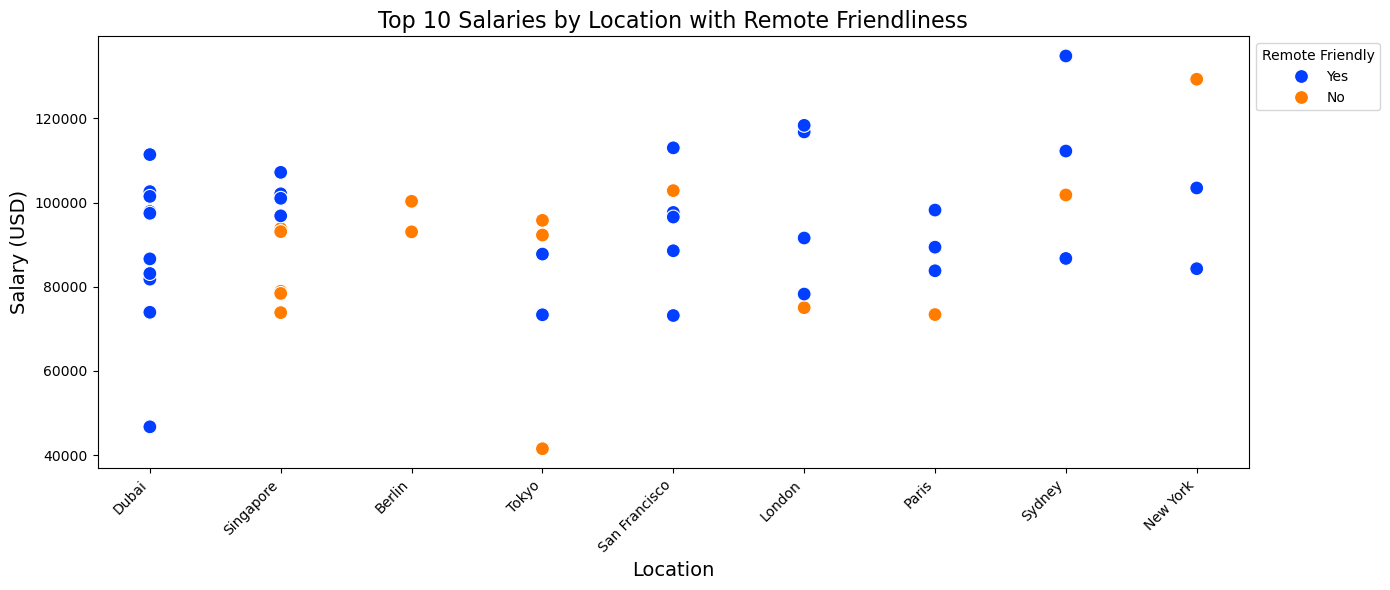

In [34]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    y=df["Salary_USD"].head(50), 
    x=df["Location"].head(50), 
    hue=df["Remote_Friendly"], 
    palette='bright', s=100
)

plt.title('Top 10 Salaries by Location with Remote Friendliness', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend(title='Remote Friendly', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

### **Conclusion**
- **Key Findings from AI Job Market Analysis**
1. #### Industry Dominance
    - Certain sectors emerge as leaders in AI adoption, signaling where talent demand and innovation are concentrated.
2. #### Geographic Compensation Patterns
   - High-paying roles exhibit distinct regional clustering, offering strategic insights for both job seekers and employers targeting competitive markets.
3. #### Remote Work Premium
   - Remote-compatible positions demonstrate measurable financial advantages, underscoring the economic value of flexible work arrangements in this sector.
#### Strategic Implications
- Our methodology—applying rigorous outlier removal and trend-focused analysis—yields a validated perspective on market dynamics. These findings equip stakeholders with actionable intelligence to:
    - Guide career development decisions for AI professionals
    - Inform corporate talent acquisition and retention strategies
    - Identify high-potential investment areas in AI-driven industries

*This analysis provides a evidence-based foundation for navigating the rapidly transforming AI employment ecosystem, highlighting pathways for professional advancement and organizational growth.*

- **Author** - *Niranjan*